In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random

from scipy.linalg import svdvals
from sklearn.preprocessing import normalize

from minsv import *
from errorbound import *
from gencorrup import *
from qrk1 import *
from qrk2 import *
from noisyRK import *
from thm25 import *

In [2]:
#Matrix dimensions
m = 20000
n = 100

#Vary the matrix type
A_t = np.random.randn(m,n)
#A_t = np.random.uniform(size=(m,n))
#A_t = np.random.binomial(1,0.5,size=(m,n))

#Create the solution equation
#A_n = normalize(A_t)
A_n = A_t
x_t = np.random.randn(n,1)
b_t = np.dot(A_n,x_t)

x_1 = np.zeros((n,1))
x_1[0] = 1

q = 0.8
b = 0.0001

e_0 = np.linalg.norm(x_t)**2

In [3]:
#Compute sigma values

#sigmin = minSV1(A_n,x_1,q,b)
#sigmin = minSV1(A_n,x_1,1,0)
#sigmin = minSV2(A_n,q,b)
sigmin = np.linalg.svd(A_n,compute_uv=False).min()
sigmax = np.linalg.svd(A_n,compute_uv=False).max()

In [4]:
sigmin

131.5377392495772

In [5]:
#Theorem 2.5
mean = 0.1
sd = 0.00001
num = 10000
sampsize = 10

In [6]:
errors_rk = error_bound_thm_2_5(A_n,mean,sd,num,sigmin,e_0)

kacz_experiment_rk_avg = [0]*num
for i in range(sampsize):
    kacz_experiment_rk = RK_ex_n(A_n,x_t,b_t,mean,sd,num)[2]
    kacz_experiment_rk_avg = list(map(lambda x: x[0]+x[1], list(zip(kacz_experiment_rk,kacz_experiment_rk_avg))))
kacz_experiment_rk_avg = list(map(lambda x: x/sampsize, kacz_experiment_rk_avg))

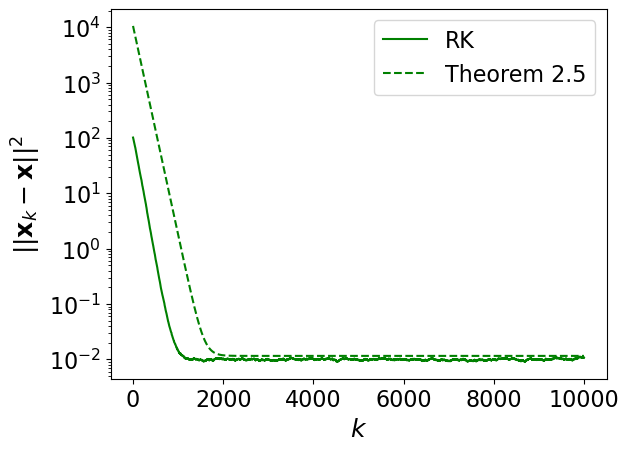

In [7]:
fig = plt.figure()

plt.semilogy(list(range(num)),kacz_experiment_rk_avg,'g-')
plt.semilogy(list(range(num)),errors_rk,'g--')

#plt.title(r"$20000 \times 100$ Matrix, $\mu = $, $\sigma = $")
plt.rcParams.update({'font.size': 16})
plt.tick_params(labelsize=16)
plt.xlabel('$k$',{'size':18})
plt.ylabel('$||\mathbf{x}_k - \mathbf{x}||^2$',{'size':18})
plt.legend(['RK','Theorem 2.5'],loc="upper right")
fig.show()